IMPORTING NECESSARY LIBRARIES
--

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [2]:
df=pd.read_csv('alzheimers_disease_data.csv')
df.head()

PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0                   0  1.725883          0               0   
1                   0  2.592424          0               0   
2                   0  7.119548          0               1   
3                   1  6.481226          0               0   
4                   0  0.014691          0               0   

   PersonalityChanges  DifficultyCompletingTasks  Forgetfulness  Diagnosis  \
0                   0                          1              0          0   
1                   0                          0              1          0   
2                   0                          1              0          0   
3                   0                          0              0          0   
4                   1                          1              0          0   

   DoctorInCharge  
0       XXXConfid  
1       XXXConfid  
2       XXXConfid  
3       XXXConfid  
4       XXXConfid  

[5 rows x 35 columns]

Droping unwanted columns

In [3]:
df=df.drop(['DoctorInCharge','PatientID'],axis=1)
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

In [4]:
df.isna().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

In [35]:
df.drop_duplicates(inplace=True)

In [5]:
df.dtypes

Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
ADL                          float64
C

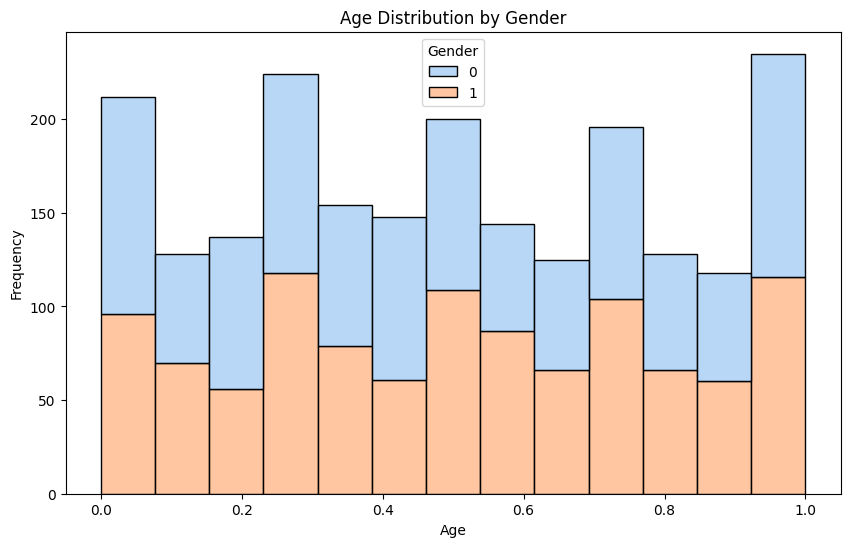

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", hue="Gender", multiple="stack", palette="pastel")
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

C:\Users\R RAJAMARI\AppData\Local\Temp\ipykernel_20636\661502594.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Smoking", y="BMI", palette="Set2")


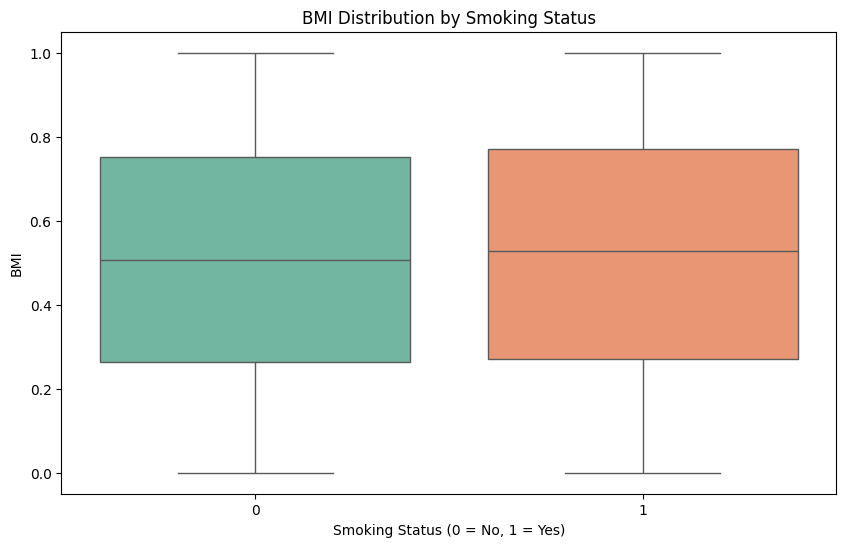

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Smoking", y="BMI", palette="Set2")
plt.title("BMI Distribution by Smoking Status")
plt.xlabel("Smoking Status (0 = No, 1 = Yes)")
plt.ylabel("BMI")
plt.show()

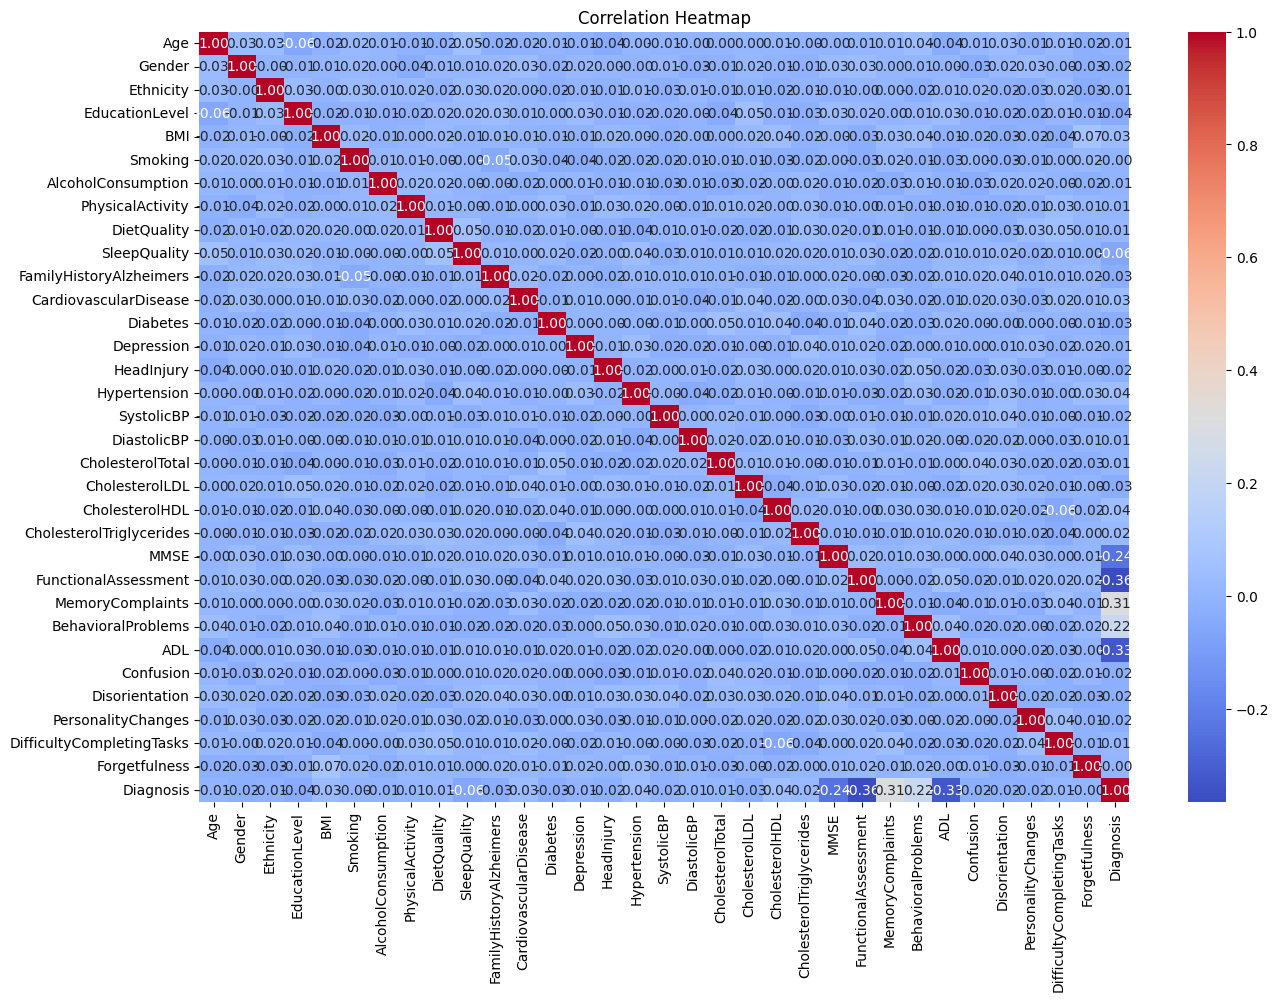

In [7]:
plt.figure(figsize=(15, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Scaling data
--

In [8]:
l=list(df.columns[df.dtypes=='float64'])
sc=MinMaxScaler()
df[l]=sc.fit_transform(df[l])
df[['Age','SystolicBP','DiastolicBP']]=sc.fit_transform(df[['Age','SystolicBP','DiastolicBP']])
df.head()

Age  Gender  Ethnicity  EducationLevel       BMI  Smoking  \
0  0.433333       0          0               2  0.316960        0   
1  0.966667       0          0               0  0.473058        0   
2  0.433333       0          3               1  0.111553        0   
3  0.466667       1          0               1  0.752163        1   
4  0.966667       0          0               0  0.228472        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0            0.665183          0.633375     0.133931      0.837564  ...   
1            0.227170          0.762862     0.050995      0.525021  ...   
2            0.978276          0.785408     0.181896      0.945597  ...   
3            0.610751          0.843804     0.743443      0.731994  ...   
4            0.923204          0.631707     0.078698      0.265892  ...   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0              0.652102                 0                   0  0.172486   
1              0.712108                 0                   0  0.259154   
2              0.589697                 0                   0  0.711936   
3              0.896823                 0                   1  0.648094   
4              0.604699                 0                   0  0.001341   

   Confusion  Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0          0               0                   0                          1   
1          0               0                   0                          0   
2          0               1                   0                          1   
3          0               0                   0                          0   
4          0               0                   1                          1   

   Forgetfulness  Diagnosis  
0              0          0  
1              1          0  
2              0          0  
3              0          0  
4              0          0  

[5 rows x 33 columns]

SPLITING LABELED AND UNLABELED DATA


In [9]:
input=df.drop('Diagnosis',axis=1)
target=df.Diagnosis

SPLITING TRAIN AND TEST DATA

In [10]:
X_train,X_test,y_train,y_test=train_test_split(input,target,test_size=0.2,random_state=42)


Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

model1.fit(X_train,y_train)

LogisticRegression()

In [12]:
predict1=model1.predict(X_test)

In [13]:
score1=model1.score(X_test,y_test)
score1

0.8302325581395349

Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()

model2.fit(X_train,y_train)


DecisionTreeClassifier()

In [15]:
predict2=model2.predict(X_test)

In [16]:
score2=model2.score(X_test,y_test)
score2

0.8930232558139535

Random Forest algorithm

In [17]:
from sklearn.ensemble import RandomForestClassifier

model3=RandomForestClassifier()

model3.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
predict3=model3.predict(X_test)

In [19]:
score3=model3.score(X_test,y_test)
score3

0.9279069767441861

naive bayes algorithm

In [20]:
from sklearn.naive_bayes import GaussianNB
model4=GaussianNB()
model4.fit(X_train,y_train)

GaussianNB()

In [21]:
predict4=model4.predict(X_test)

In [22]:
score4=model4.score(X_test,y_test)
score4

0.8325581395348837

Evaluation
--

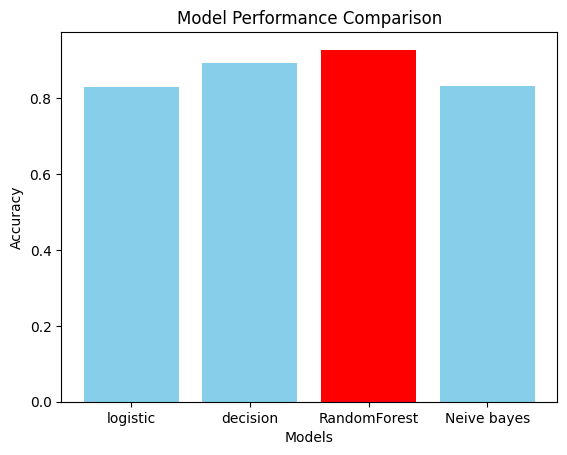

In [23]:
model_names = ['logistic', 'decision', 'RandomForest', 'Neive bayes']

# List of accuracies for each model
accuracies=[score1,score2,score3,score4]

# Plotting the accuracies
plt.bar(model_names, accuracies, color= ['red' if max(accuracies) == score else 'skyblue' for score in accuracies])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison') 
plt.show()

<Axes: >

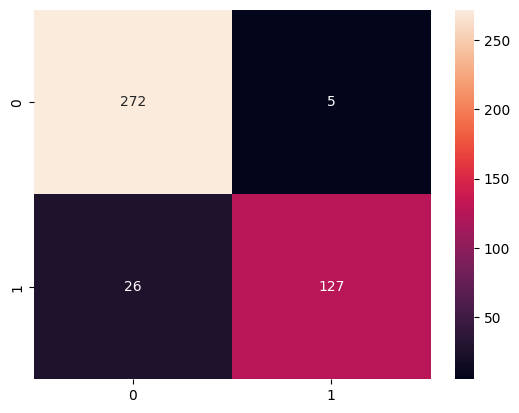

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred=predict3,y_true=y_test)
sns.heatmap(cm,annot=True,fmt='d')

In [25]:
print(classification_report(y_pred=predict3,y_true=y_test))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       277
           1       0.96      0.83      0.89       153

    accuracy                           0.93       430
   macro avg       0.94      0.91      0.92       430
weighted avg       0.93      0.93      0.93       430

